In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



## 1. Data Loading and Overview

In [27]:
# Load the data
df = pd.read_csv('Loan_default.csv')

df.shape

(255347, 18)

In [28]:

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [34]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:

print("Statistical Summary of Numerical Features:")
df.describe().

Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


# Target Variable Analysis

In [53]:
# Default distribution
print("Default Distribution:")

print(df['Default'].value_counts())
print("\nPercentage Distribution:")
print(df['Default'].value_counts(normalize=True) * 100)

default_rate = df['Default'].mean() * 100
print(f"\nOverall Default Rate: {default_rate:.2f}%")

Default Distribution:
Default
0    225694
1     29653
Name: count, dtype: int64

Percentage Distribution:
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

Overall Default Rate: 11.61%


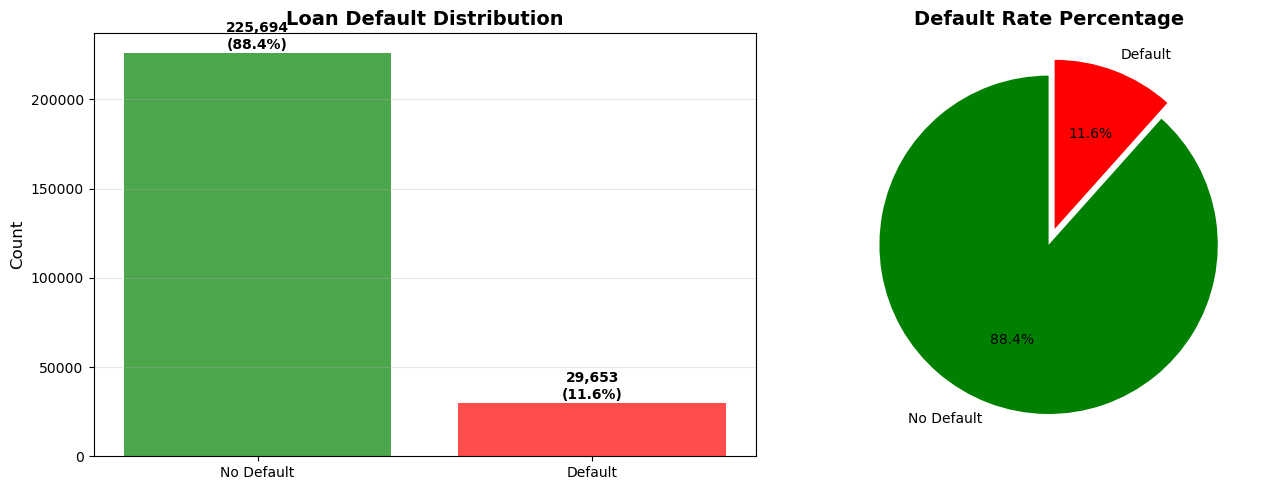

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
default_counts = df['Default'].value_counts()
axes[0].bar(['No Default', 'Default'], default_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Loan Default Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(default_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}\n({v/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['green', 'red']
axes[1].pie(default_counts.values, labels=['No Default', 'Default'], autopct='%1.1f%%',
           colors=colors, startangle=90, explode=[0, 0.1])
axes[1].set_title('Default Rate Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Numerical Features Analysis

In [54]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['LoanID', 'Default']]

print(f"Numerical Features ({len(numerical_cols)}):")
print(numerical_cols)

Numerical Features (9):
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


In [ ]:

print("Numerical Features by Default Status:")

for col in numerical_cols:
    no_default = df[df['Default'] == 0][col].mean()
    default = df[df['Default'] == 1][col].mean()
    diff = ((default - no_default) / no_default * 100)
    
    print(f"\n{col}:")
    print(f"  No Default: {no_default:.2f}")
    print(f"  Default:    {default:.2f}")
    print(f"  Difference: {diff:+.1f}%")

Numerical Features by Default Status:

Age:
  No Default: 44.41
  Default:    36.56
  Difference: -17.7%

Income:
  No Default: 83899.17
  Default:    71844.72
  Difference: -14.4%

LoanAmount:
  No Default: 125353.66
  Default:    144515.31
  Difference: +15.3%

CreditScore:
  No Default: 576.23
  Default:    559.29
  Difference: -2.9%

MonthsEmployed:
  No Default: 60.76
  Default:    50.24
  Difference: -17.3%

NumCreditLines:
  No Default: 2.49
  Default:    2.59
  Difference: +4.0%

InterestRate:
  No Default: 13.18
  Default:    15.90
  Difference: +20.6%

LoanTerm:
  No Default: 36.02
  Default:    36.05
  Difference: +0.1%

DTIRatio:
  No Default: 0.50
  Default:    0.51
  Difference: +2.8%


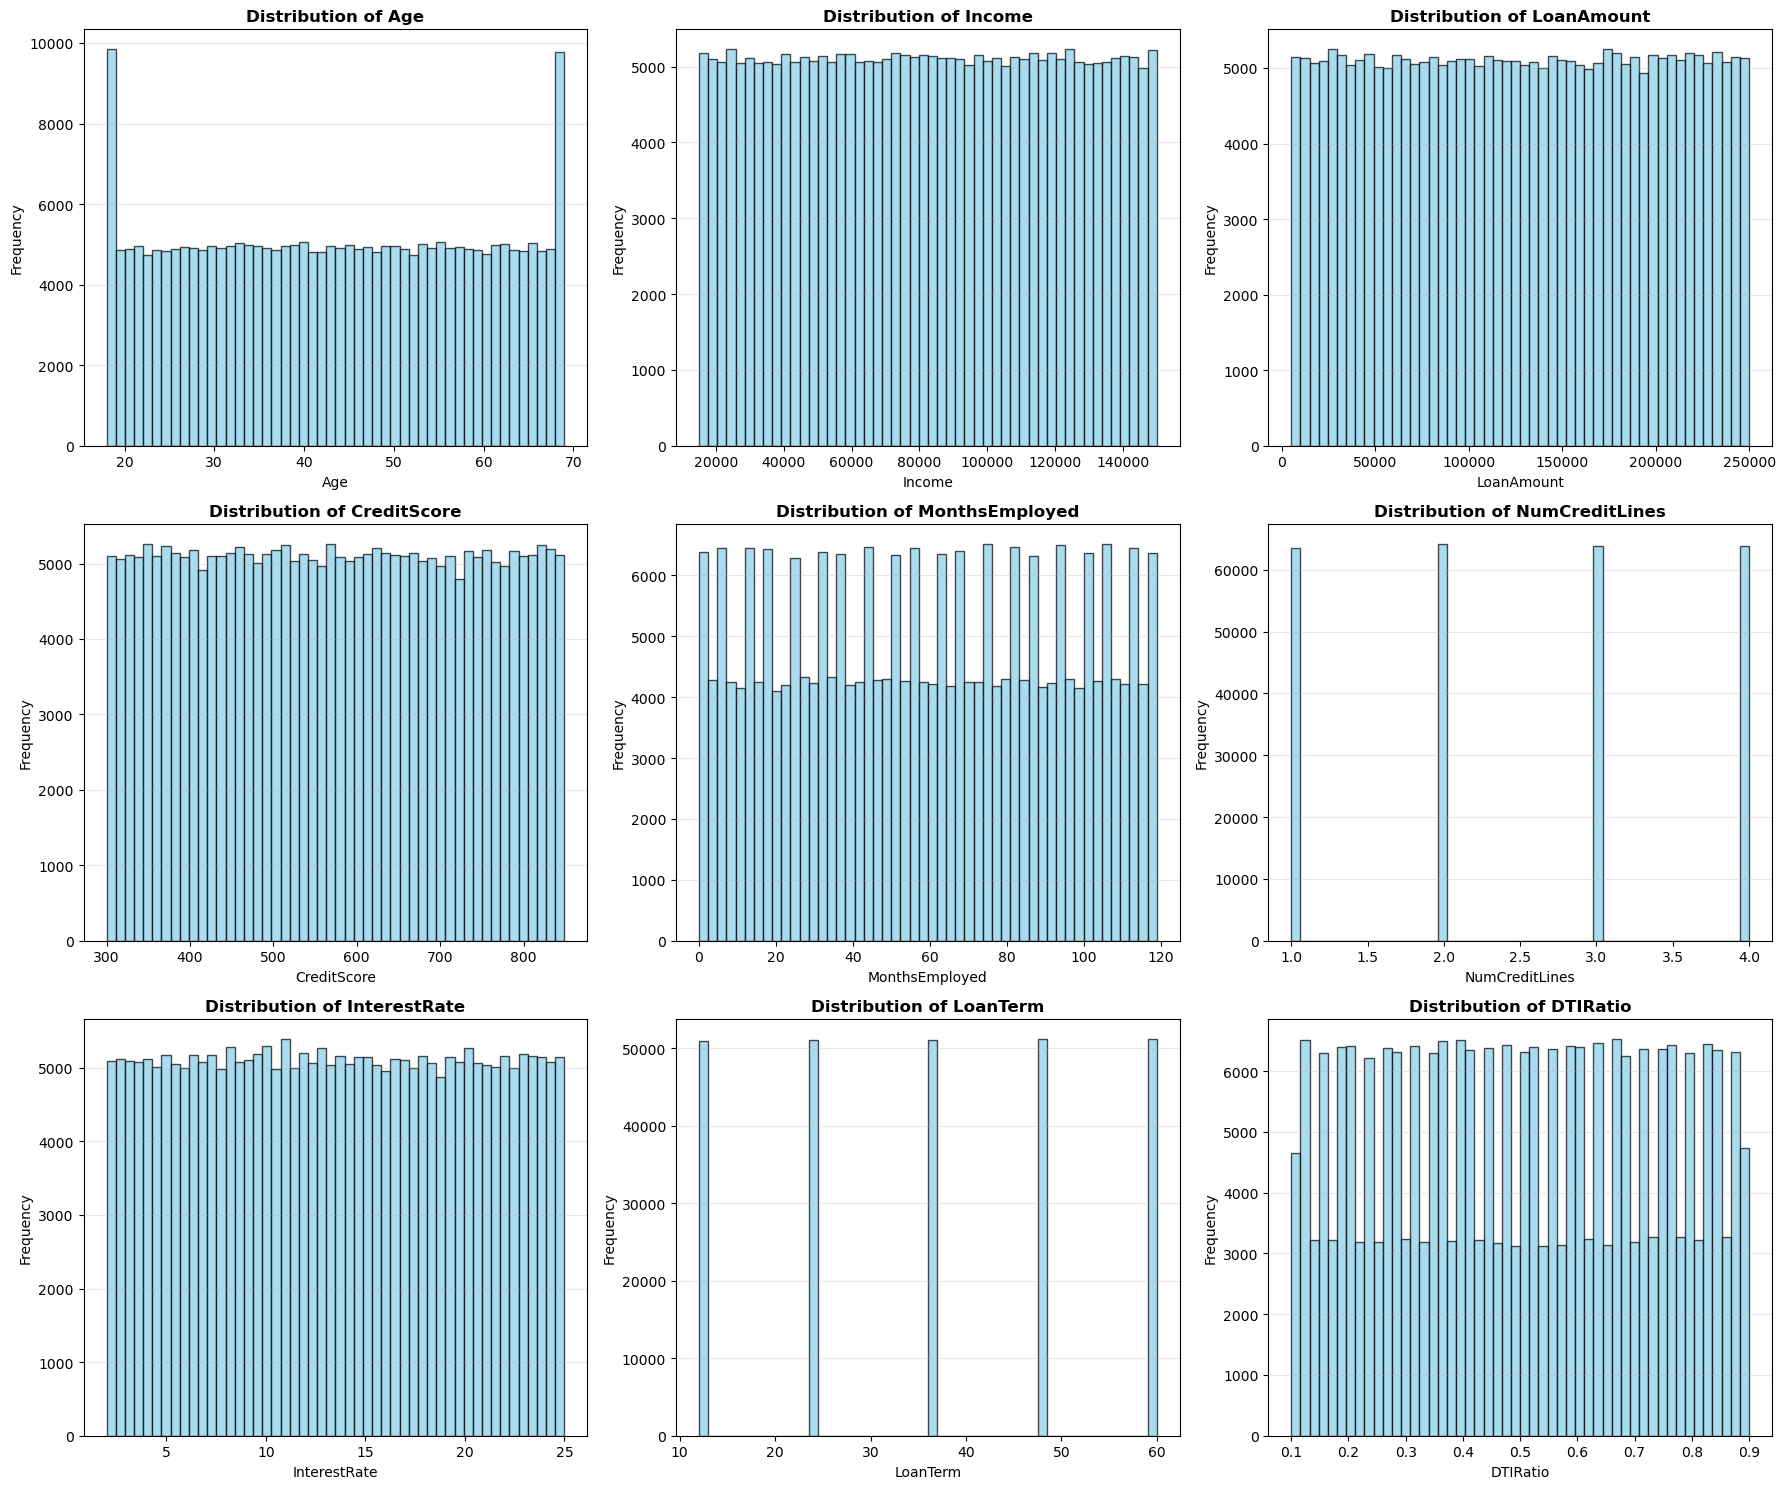

In [40]:
# Distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 5. Key Risk Indicators Analysis

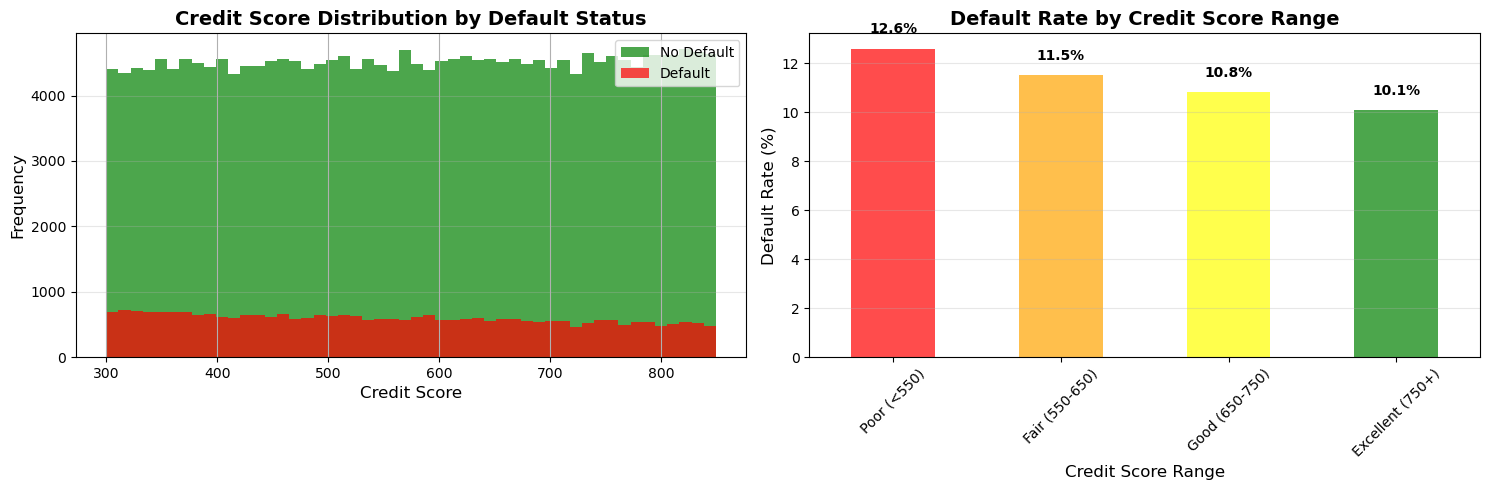

In [41]:
# Credit Score Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution by default
df[df['Default'] == 0]['CreditScore'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                             color='green', label='No Default')
df[df['Default'] == 1]['CreditScore'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                             color='red', label='Default')
axes[0].set_title('Credit Score Distribution by Default Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Default rate by credit score bins
df['CreditScore_Bin'] = pd.cut(df['CreditScore'], bins=[0, 550, 650, 750, 850],
                                labels=['Poor (<550)', 'Fair (550-650)', 'Good (650-750)', 'Excellent (750+)'])
default_by_credit = df.groupby('CreditScore_Bin')['Default'].mean() * 100

default_by_credit.plot(kind='bar', ax=axes[1], color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
axes[1].set_title('Default Rate by Credit Score Range', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Credit Score Range', fontsize=12)
axes[1].set_ylabel('Default Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(default_by_credit.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

df.drop('CreditScore_Bin', axis=1, inplace=True)

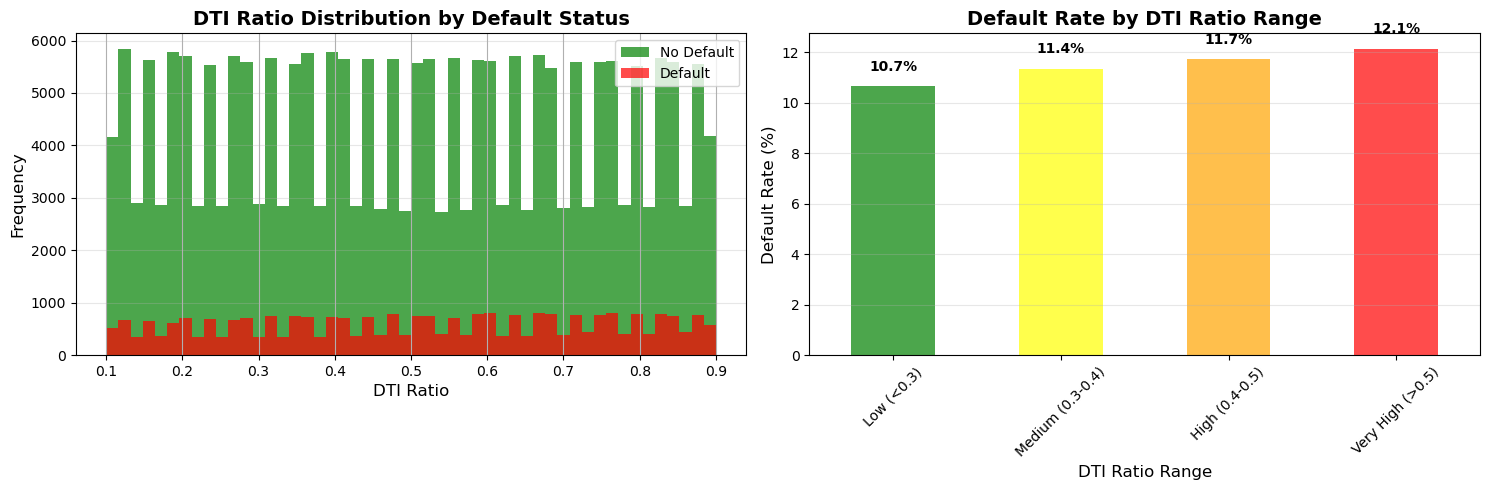

In [42]:
# DTI Ratio Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution by default
df[df['Default'] == 0]['DTIRatio'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                          color='green', label='No Default')
df[df['Default'] == 1]['DTIRatio'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                          color='red', label='Default')
axes[0].set_title('DTI Ratio Distribution by Default Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('DTI Ratio', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Default rate by DTI bins
df['DTI_Bin'] = pd.cut(df['DTIRatio'], bins=[0, 0.3, 0.4, 0.5, 1.0],
                       labels=['Low (<0.3)', 'Medium (0.3-0.4)', 'High (0.4-0.5)', 'Very High (>0.5)'])
default_by_dti = df.groupby('DTI_Bin')['Default'].mean() * 100

default_by_dti.plot(kind='bar', ax=axes[1], color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
axes[1].set_title('Default Rate by DTI Ratio Range', fontsize=14, fontweight='bold')
axes[1].set_xlabel('DTI Ratio Range', fontsize=12)
axes[1].set_ylabel('Default Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(default_by_dti.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

df.drop('DTI_Bin', axis=1, inplace=True)

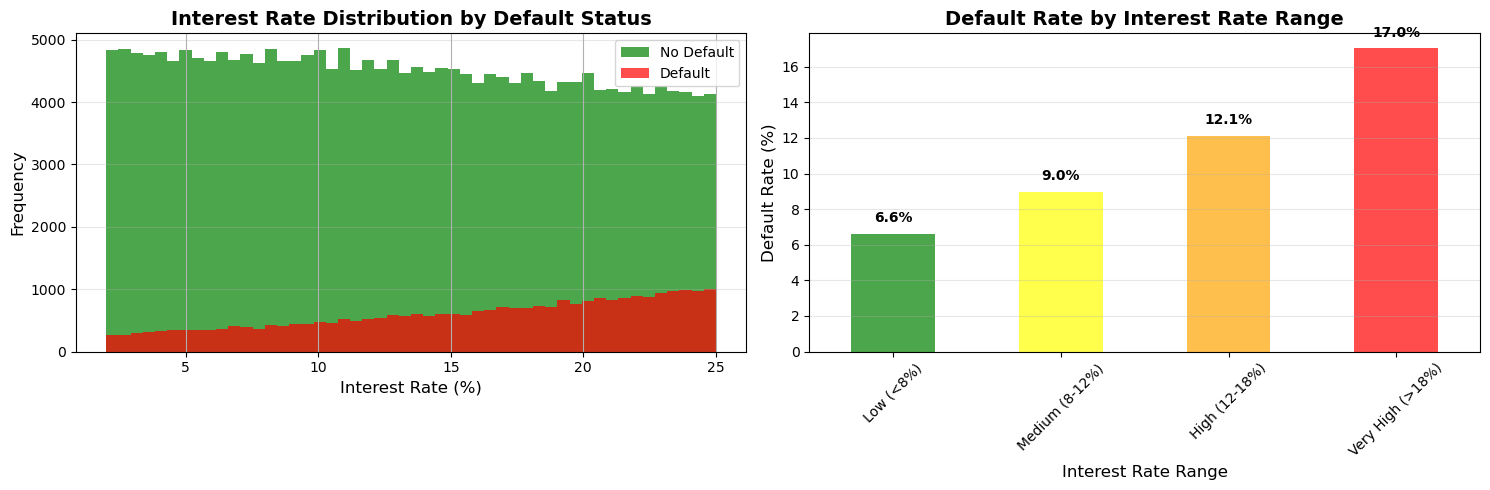

In [43]:
# Interest Rate Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution by default
df[df['Default'] == 0]['InterestRate'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                              color='green', label='No Default')
df[df['Default'] == 1]['InterestRate'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                              color='red', label='Default')
axes[0].set_title('Interest Rate Distribution by Default Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Interest Rate (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Default rate by interest rate bins
df['InterestRate_Bin'] = pd.cut(df['InterestRate'], bins=[0, 8, 12, 18, 30],
                                labels=['Low (<8%)', 'Medium (8-12%)', 'High (12-18%)', 'Very High (>18%)'])
default_by_rate = df.groupby('InterestRate_Bin')['Default'].mean() * 100

default_by_rate.plot(kind='bar', ax=axes[1], color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
axes[1].set_title('Default Rate by Interest Rate Range', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Interest Rate Range', fontsize=12)
axes[1].set_ylabel('Default Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(default_by_rate.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

df.drop('InterestRate_Bin', axis=1, inplace=True)

## 6. Categorical Features Analysis

In [57]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'LoanID']

print(f"Categorical Features ({len(categorical_cols)}):")
print(categorical_cols)

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical Features (7):
['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

Education:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

HasCoSigner:
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


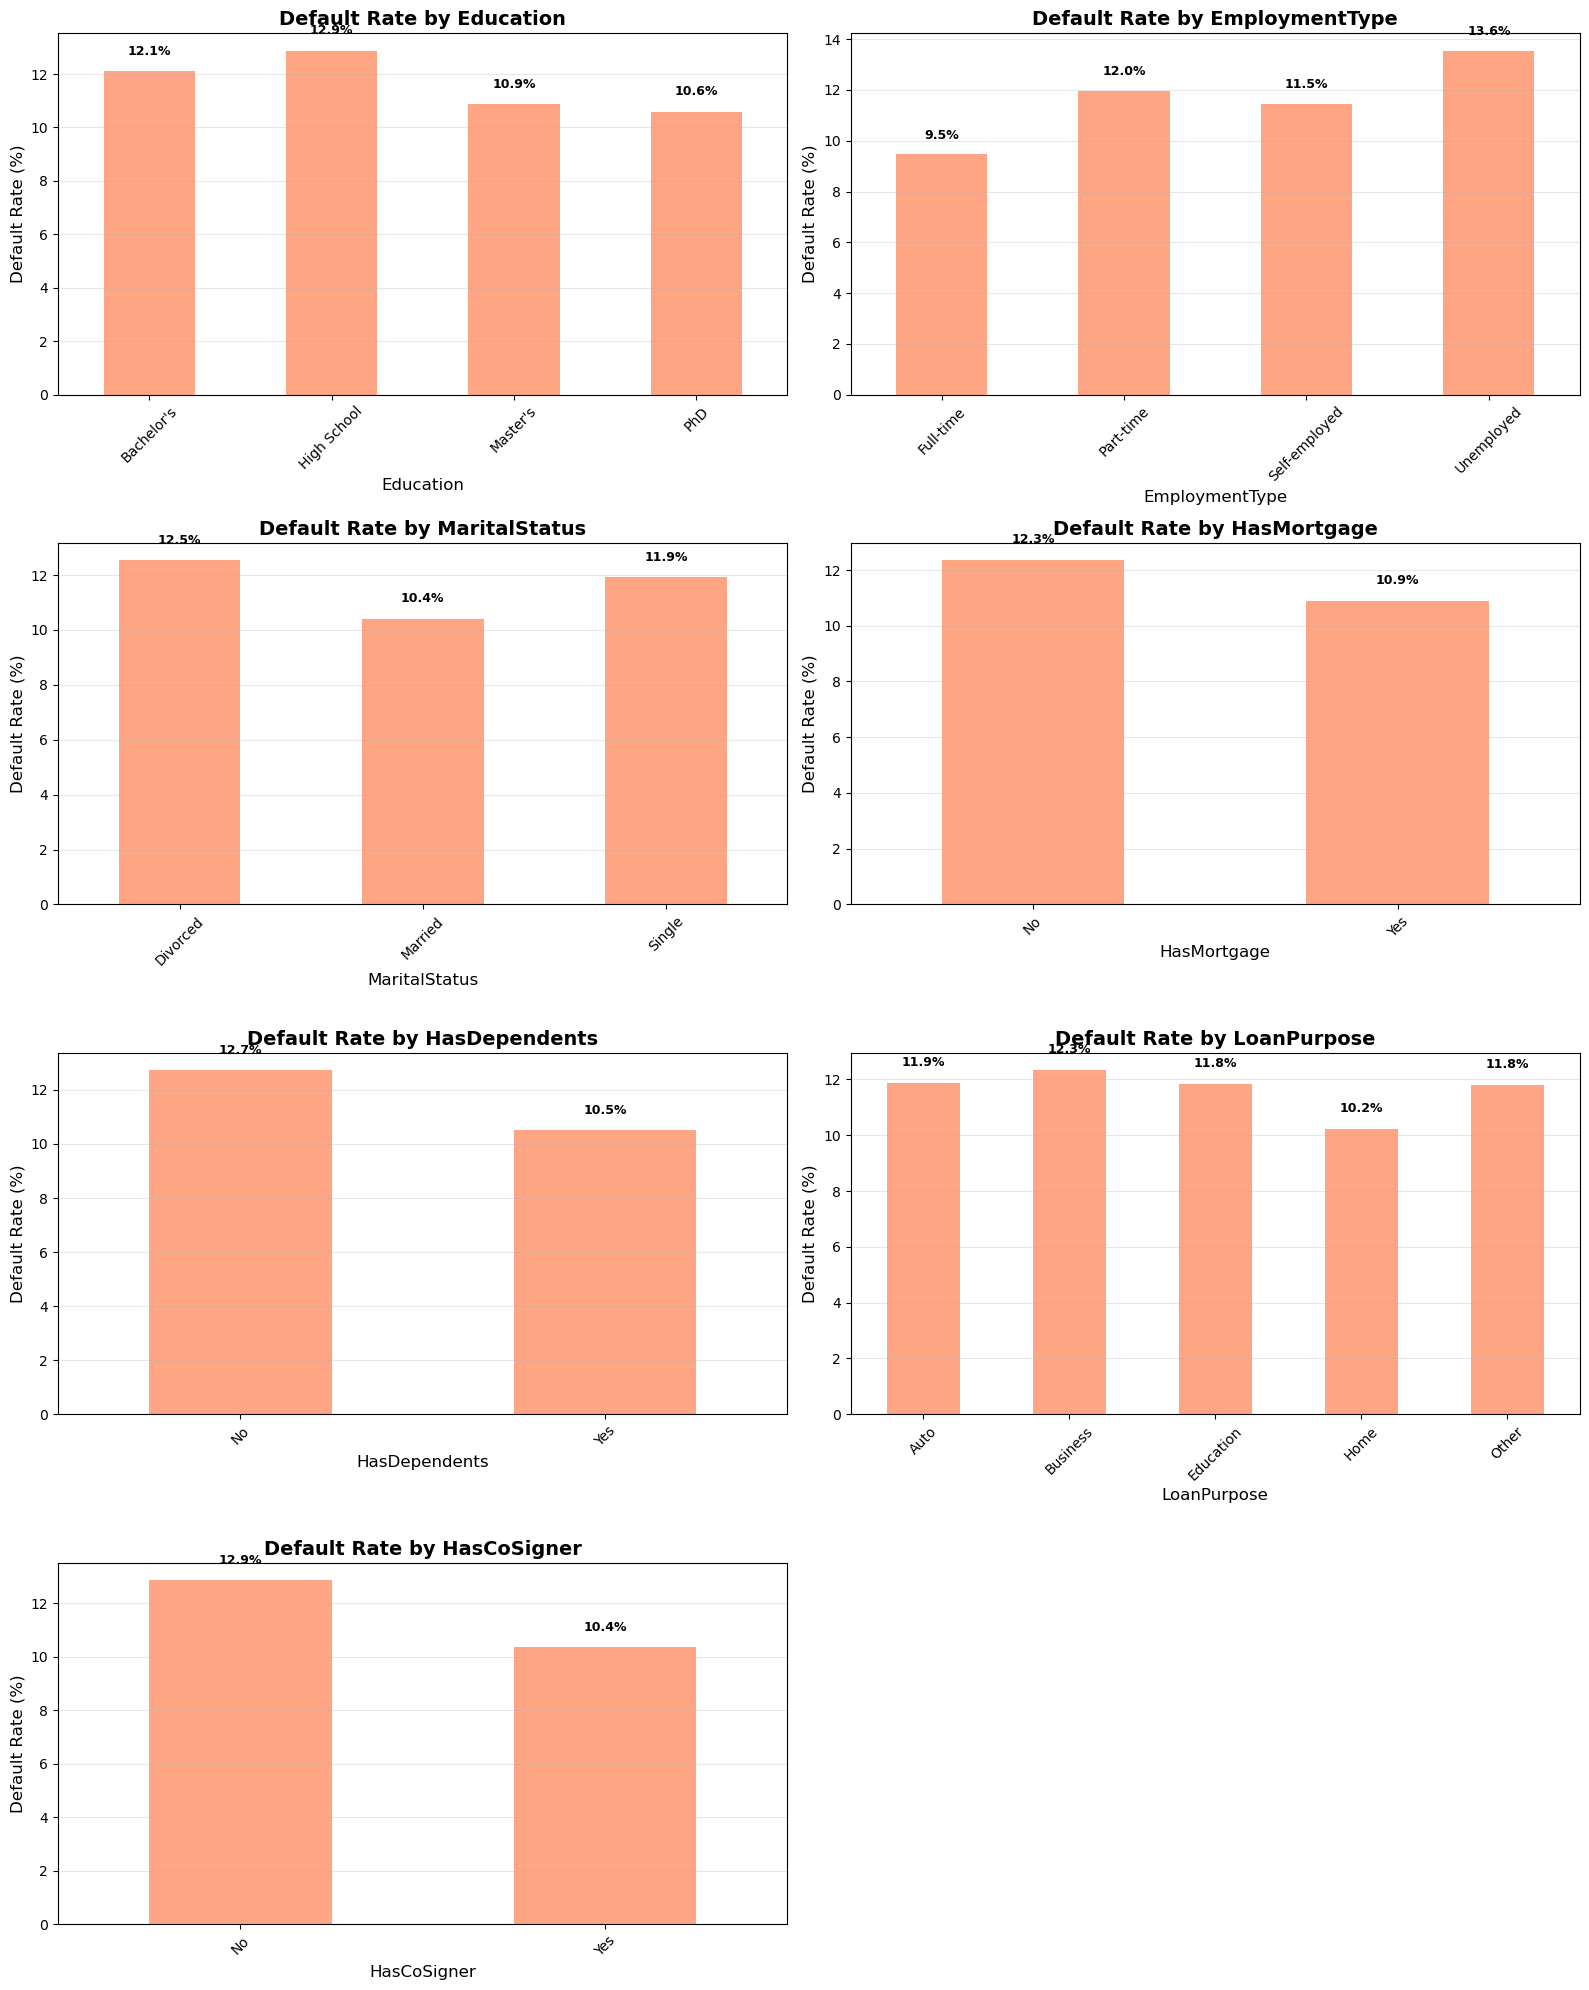

In [45]:
# Default rate by categorical features
n_cols = len(categorical_cols)
n_rows = (n_cols + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(16, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    default_rate = df.groupby(col)['Default'].mean() * 100
    default_rate.plot(kind='bar', ax=axes[idx], color='coral', alpha=0.7)
    axes[idx].set_title(f'Default Rate by {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Default Rate (%)', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(default_rate.values):
        axes[idx].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Remove extra subplot if odd number
if n_cols % 2 == 1:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

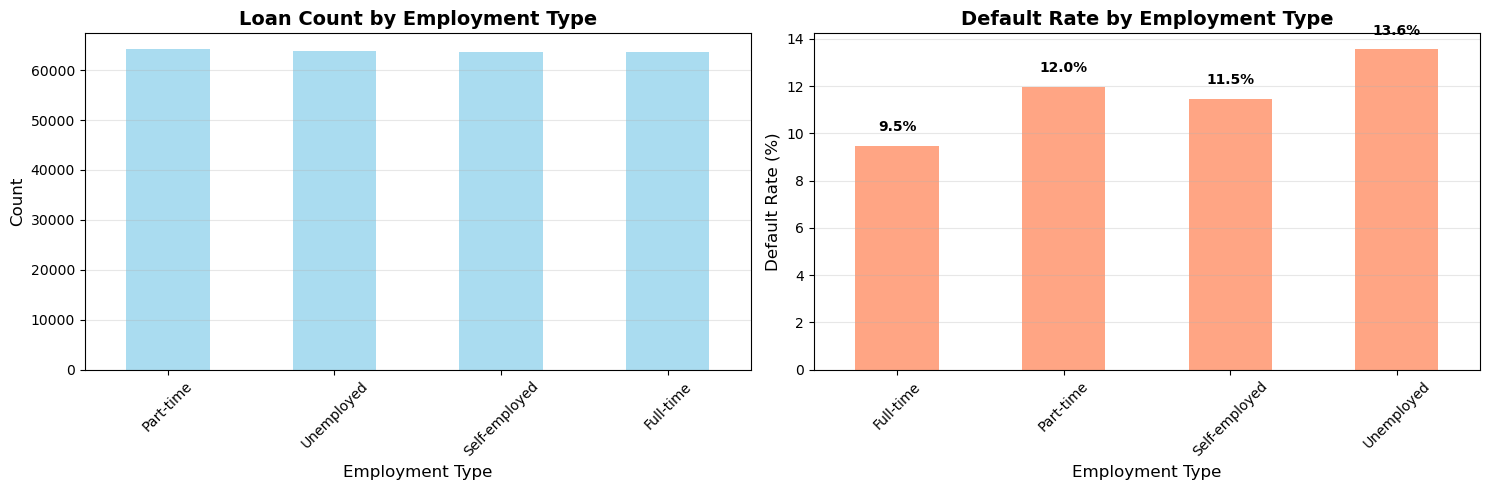

In [46]:
# Employment Type deep dive
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count by employment type
employment_counts = df['EmploymentType'].value_counts()
employment_counts.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
axes[0].set_title('Loan Count by Employment Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Employment Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Default rate by employment type
default_by_employment = df.groupby('EmploymentType')['Default'].mean() * 100
default_by_employment.plot(kind='bar', ax=axes[1], color='coral', alpha=0.7)
axes[1].set_title('Default Rate by Employment Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Employment Type', fontsize=12)
axes[1].set_ylabel('Default Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(default_by_employment.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

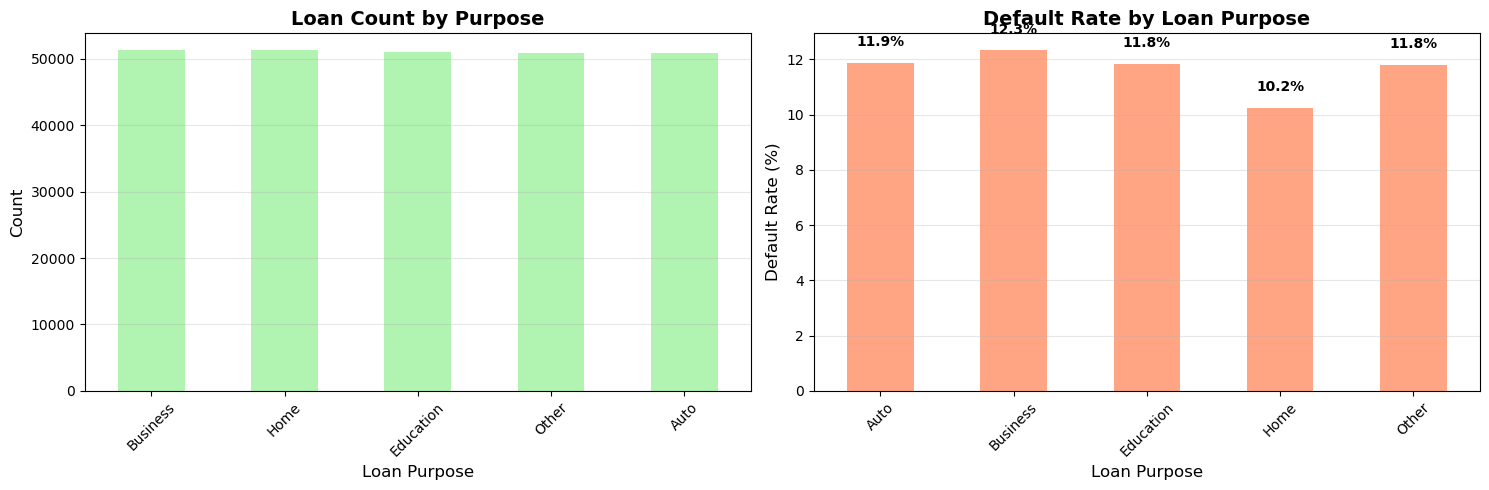

In [47]:
# Loan Purpose deep dive
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count by loan purpose
purpose_counts = df['LoanPurpose'].value_counts()
purpose_counts.plot(kind='bar', ax=axes[0], color='lightgreen', alpha=0.7)
axes[0].set_title('Loan Count by Purpose', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Purpose', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Default rate by loan purpose
default_by_purpose = df.groupby('LoanPurpose')['Default'].mean() * 100
default_by_purpose.plot(kind='bar', ax=axes[1], color='coral', alpha=0.7)
axes[1].set_title('Default Rate by Loan Purpose', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Purpose', fontsize=12)
axes[1].set_ylabel('Default Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(default_by_purpose.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

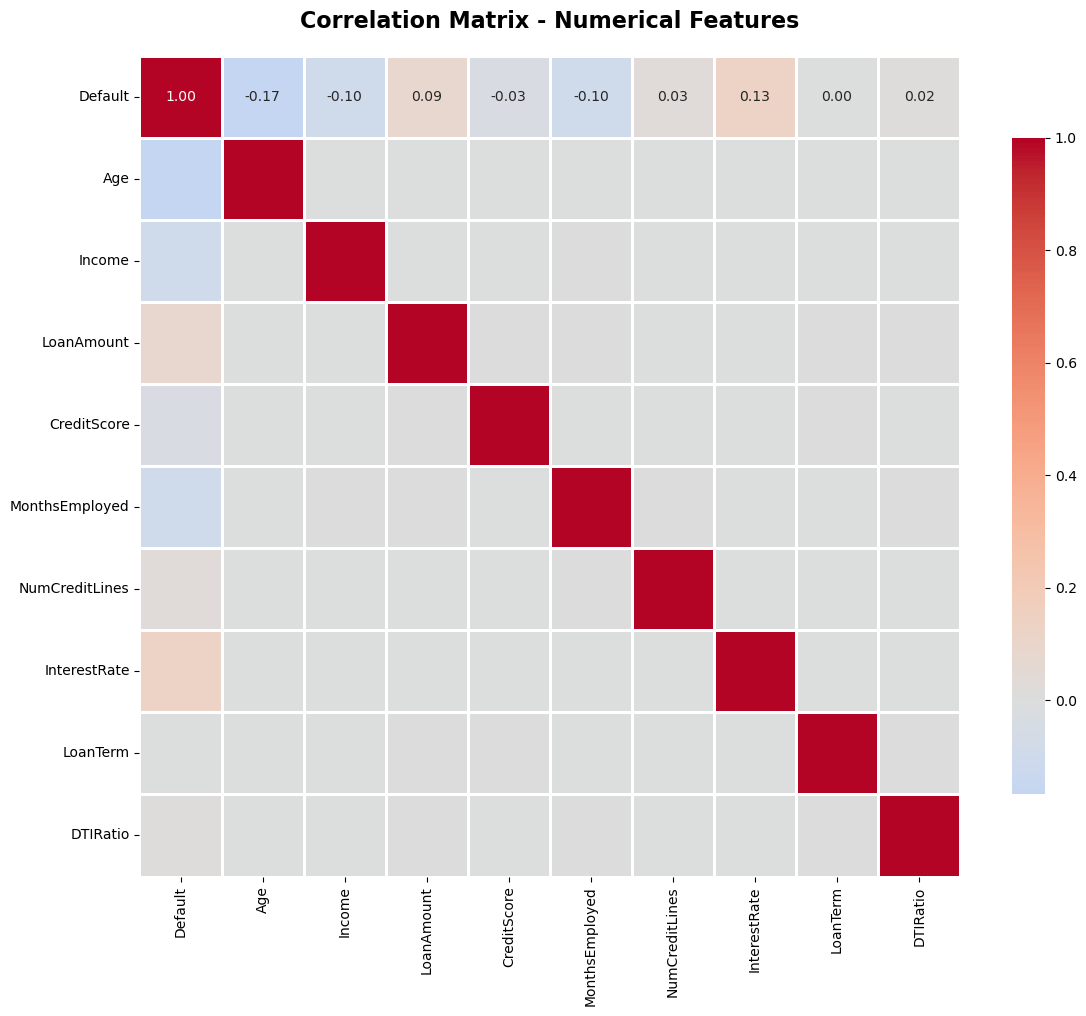

In [60]:
# Correlation matrix for numerical features
corr_cols = ['Default'] + numerical_cols 
correlation_matrix = df[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 9. Outlier Detection

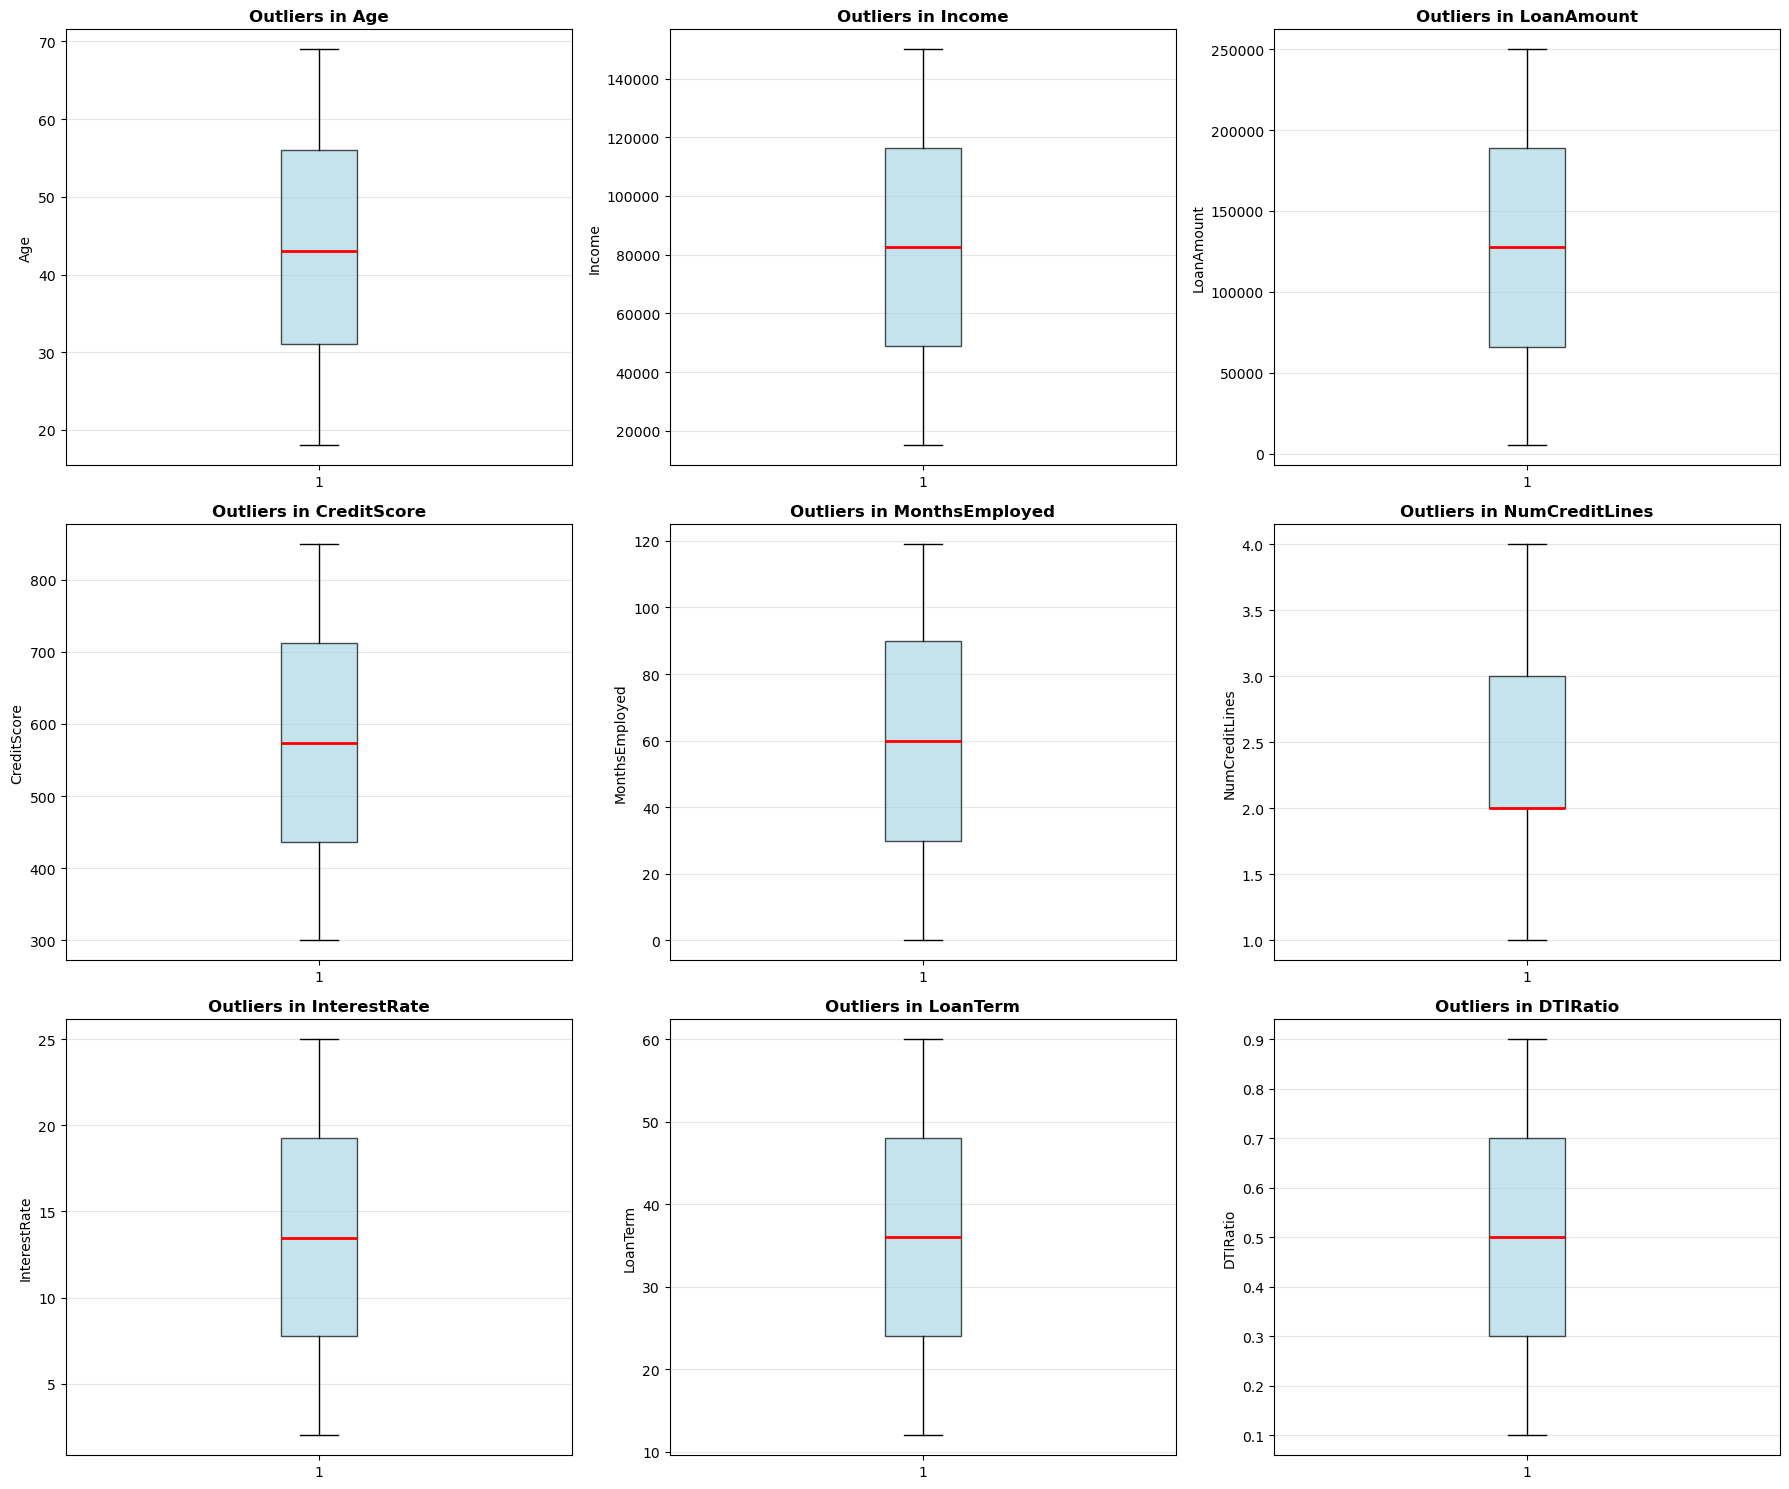

In [50]:
# Boxplots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Outliers in {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col, fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()